# Imported Needed Libraries

In [1]:
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Flatten
from keras.layers.embeddings import Embedding

* 2. Create Documents And Labels

In [2]:
#define document
docs = ["Well done!", "Good work","Great effort","nice work","Excellent!","Weak","Poor effort!","not good","poor work","Could have done better."]
#define class labels 
labels = [1,1,1,1,1,0,0,0,0,0]
# integer encode the documents
#vocab_size = 50

* 3. Encode Documents by using [one_hot(d,vocab_size) for d in docs]

In [3]:
t = Tokenizer()
t.fit_on_texts(docs)
vocab_size = len(t.word_index) + 1 

4. Integer Encode the documents

In [4]:
encoded_docs = t.texts_to_sequences(docs)
print(encoded_docs)

[[6, 2], [3, 1], [7, 4], [8, 1], [9], [10], [5, 4], [11, 3], [5, 1], [12, 13, 2, 14]]


5.  pad documents to a max length of 4 words

In [5]:
max_length = 4
padded_docs = pad_sequences(encoded_docs , maxlen = max_length , padding = 'post')
print(padded_docs)

[[ 6  2  0  0]
 [ 3  1  0  0]
 [ 7  4  0  0]
 [ 8  1  0  0]
 [ 9  0  0  0]
 [10  0  0  0]
 [ 5  4  0  0]
 [11  3  0  0]
 [ 5  1  0  0]
 [12 13  2 14]]


6. Define The Model

In [6]:
model = Sequential()
model.add(Embedding(vocab_size , 8 , input_length = max_length))
model.add(Flatten())
model.add(Dense(1,activation = 'sigmoid'))

7. Compile Model

In [7]:
model.compile(optimizer = 'adam' , loss = 'binary_crossentropy',metrics = ['acc'])

8. Model Summarize

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 4, 8)              120       
                                                                 
 flatten (Flatten)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 153
Trainable params: 153
Non-trainable params: 0
_________________________________________________________________


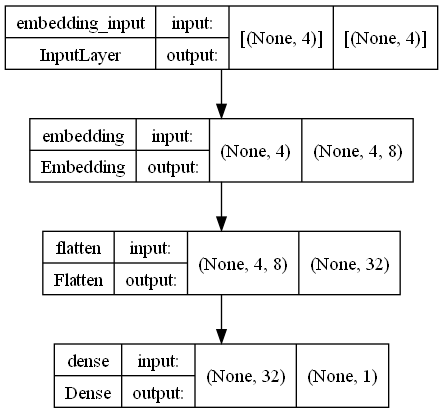

In [9]:
from tensorflow.keras.utils import plot_model
plot_model(model , show_shapes = True , show_layer_names =True)

10. Fit Model

In [10]:
model.fit(padded_docs, labels, epochs=50, verbose=0)

ValueError: Failed to find data adapter that can handle input: <class 'numpy.ndarray'>, (<class 'list'> containing values of types {"<class 'int'>"})

In [11]:
# fit the model
model.fit(padded_docs, labels, epochs=50, verbose=0)
# evaluate the model
loss, accuracy = model.evaluate(padded_docs, labels, verbose=0)
print('Accuracy: %f' % (accuracy*100))

ValueError: Failed to find data adapter that can handle input: <class 'numpy.ndarray'>, (<class 'list'> containing values of types {"<class 'int'>"})